In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np

In [3]:
!pip install scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/920.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/920.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/920.8 kB ? eta -:--:--
   --------------------- ---------------- 524.3/920.8 kB 509.0 kB/s eta 0:00:01
   --------------------- ---------------- 524.3/920.8 kB 509.0 kB/s eta 0:00:01
   -------------------------------- ----- 786.4/920.8 kB 599.2 kB/s eta 0:00:01
   -------------------------------------- 920.8/920.8 kB 554.9 kB/s eta 0:00:00


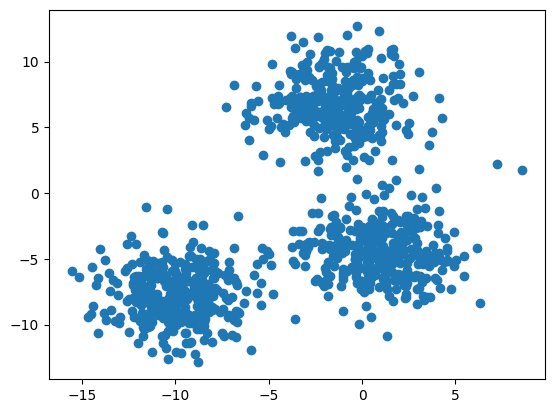

In [17]:
x,_ = make_blobs(n_samples=1000,n_features=2,centers=3, cluster_std=2,random_state=100)
plt.scatter(x[:,0],x[:,1])

In [50]:
import skfuzzy as fuzzy 
from matplotlib.patches import Circle

In [46]:
cntr, u, u0,d,jm,p, fpc  = fuzzy.cluster.cmeans(x.T,c=3,m=2,error=0.005,maxiter=1000)
u

array([[0.94141037, 0.99518271, 0.94929689, ..., 0.02883179, 0.1992149 ,
        0.06276029],
       [0.01680178, 0.00154258, 0.01811883, ..., 0.9203202 , 0.15723397,
        0.09477519],
       [0.04178785, 0.00327471, 0.03258428, ..., 0.05084801, 0.64355113,
        0.84246452]])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15432\295331398.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:,0],x[:,1],c=u.T,cmap='Reds')


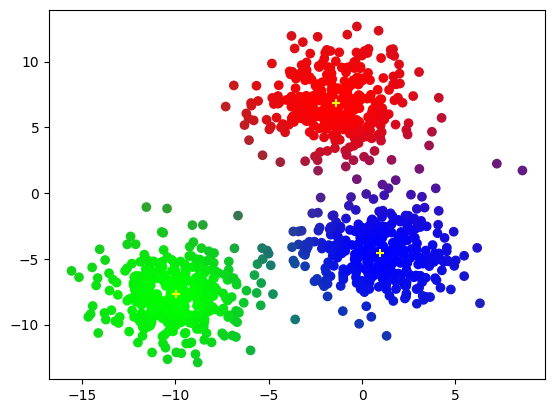

In [47]:
plt.scatter(x[:,0],x[:,1],c=u.T,cmap='Reds')
plt.scatter(cntr[:,0],cntr[:,1],marker="+",color='yellow')

In [48]:
cntr

array([[-1.41321708,  6.84440586],
       [-9.95499759, -7.68603498],
       [ 0.95584116, -4.56062287]])

In [49]:
radii = []
for i in range(cntr.shape[0]):
    weights = u[i]  # fuzzy membership of each point in cluster i
    weighted_squared_dist = weights * d[i]**2
    radius = np.sqrt(np.sum(weighted_squared_dist) / np.sum(weights))
    radii.append(radius)
radii

[4.530122429555228, 4.533927911040362, 4.545877057152325]

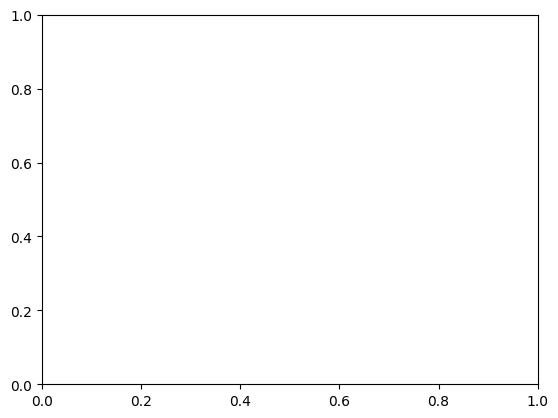

In [81]:
# fig, ax = plt.subplots()

# circle = Circle((cntr[1,0], cntr[1,1]),radii[1],color='red')
# ax.add_patch(circle)

    

In [55]:
# colors = ['red', 'blue', 'green']
# plt.figure(figsize=(8, 6))

# for i in range(3):  # For each cluster
#     cluster_points = x[labels == i]  # Get points in this cluster

#     # Plot the points
#     plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
#                 color=colors[i], alpha=0.5, label=f'Cluster {i+1}')

#     # Plot the cluster center
#     plt.scatter

NameError: name 'labels' is not defined

<Figure size 800x600 with 0 Axes>

In [68]:
# type(cntr[:,0][0])

numpy.float64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15432\1877341429.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = Circle((x, y), radius, color='red', alpha=0.3, edgecolor='black')


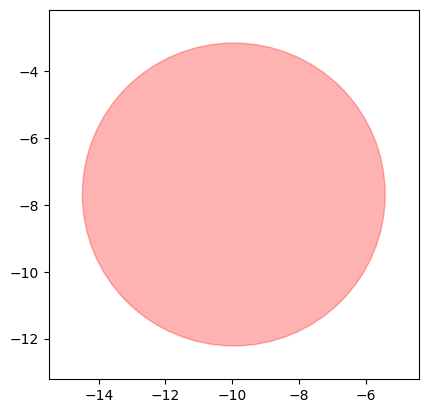

In [87]:
# import matplotlib.pyplot as plt
# from matplotlib.patches import Circle

# fig, ax = plt.subplots()

# # Use direct indexing
# x = cntr[1, 0]
# y = cntr[1, 1]
# radius = radii[1]

# # Create and add circle
# circle = Circle((x, y), radius, color='red', alpha=0.3, edgecolor='black')
# ax.add_patch(circle)

# # Optional: Set axes limits and equal aspect
# ax.set_xlim(x - radius - 1, x + radius + 1)
# ax.set_ylim(y - radius - 1, y + radius + 1)
# ax.set_aspect('equal')

# plt.show()
